In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np 

## This is a notebook where I explored the data first and further play with the dataset alongside the tableau story here https://public.tableau.com/views/5000incdataset-storyKE/Story1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link 

# Analyze the 5000 inc dataset in tableu

In [2]:
csv_file_path = './Data Set- Inc5000 Company List_2014.csv'

In [3]:
data = pd.read_csv(csv_file_path)

In [4]:
data.head()

,_input,_num,_widgetName,_source,_resultNumber,_pageUrl,id,rank,workers,company,url,state_l,state_s,city,metro,growth,revenue,industry,yrs_on_list
0,NaN,1,Inc5000 Company List,Inc5000 Company List,1,http://www.inc.com/inc5000list/json/inc5000_20...,22890,1,227,Fuhu,fuhu,California,CA,El Segundo,Los Angeles,158956.9106,195640000,Consumer Products & Services,2
1,NaN,2,Inc5000 Company List,Inc5000 Company List,2,http://www.inc.com/inc5000list/json/inc5000_20...,25747,2,191,Quest Nutrition,quest-nutrition,California,CA,El Segundo,Los Angeles,57347.9246,82640563,Food & Beverage,1
2,NaN,3,Inc5000 Company List,Inc5000 Company List,3,http://www.inc.com/inc5000list/json/inc5000_20...,25643,3,145,Reliant Asset Management,reliant-asset-management,Virginia,VA,Arlington,Washington DC,55460.1646,85076502,Business Products & Services,1
3,NaN,4,Inc5000 Company List,Inc5000 Company List,4,http://www.inc.com/inc5000list/json/inc5000_20...,26098,4,62,Superfish,superfish,California,CA,Palo Alto,San Jose,26042.9630,35293000,Software,1
4,NaN,5,Inc5000 Company List,Inc5000 Company List,5,http://www.inc.com/inc5000list/json/inc5000_20...,26182,5,92,Acacia Communications,acacia-communications,Massachusetts,MA,Maynard,Boston,20690.4578,77652360,Telecommunications,1


In [5]:
data.columns

Index(['_input', '_num', '_widgetName', '_source', '_resultNumber', '_pageUrl',
       'id', 'rank', 'workers', 'company', 'url', 'state_l', 'state_s', 'city',
       'metro', 'growth', 'revenue', 'industry', 'yrs_on_list'],
      dtype='object')

In [6]:
data.dtypes


_input           float64
_num               int64
_widgetName       object
_source           object
_resultNumber      int64
_pageUrl          object
id                 int64
rank               int64
workers            int64
company           object
url               object
state_l           object
state_s           object
city              object
metro             object
growth           float64
revenue            int64
industry          object
yrs_on_list        int64
dtype: object

In [7]:
len(data)

5000

In [8]:
# load the dataset
def load_and_clean_data(filepath):    
    data = pd.read_csv(filepath)
    data['revenue'] = data['revenue'].replace('[\$,]', '', regex=True).astype(float)
    data['growth'] = data['growth'].replace('[\$,]', '', regex=True).astype(float)
    data['workers'] = data['workers'].replace('[\$,]', '', regex=True).astype(float)
    return data

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
/var/folders/s9/tswd2xls6nd_snq8431jvh040000gn/T/ipykernel_56903/1442674703.py:4: SyntaxWarning: invalid escape sequence '\$'
  data['revenue'] = data['revenue'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/s9/tswd2xls6nd_snq8431jvh040000gn/T/ipykernel_56903/1442674703.py:5: SyntaxWarning: invalid escape sequence '\$'
  data['growth'] = data['growth'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/s9/tswd2xls6nd_snq8431jvh040000gn/T/ipykernel_56903/1442674703.py:6: SyntaxWarning: invalid escape sequence '\$'
  data['workers'] = data['workers'].replace('[\$,]', '', regex=True).astype(float)


In [9]:
# calculate the percentage of industry revenue
def calculate_industry_revenue_percentage(data):
    # Group by industry and sum revenues and calculate the total revenue
    industry_revenue = data.groupby('industry')['revenue'].sum()
    total_revenue = industry_revenue.sum()
    
    # Calculate the percentage of each industry's revenue and sort the results in descending order
    industry_revenue_percentage = (industry_revenue / total_revenue) * 100
    return industry_revenue_percentage.sort_values(ascending=False)

In [10]:
# plotting the percentage of industry revenue
def plot_revenue_percentage(revenue_percentage):
    plt.figure(figsize=(14, 8))
    revenue_percentage.plot(kind='barh', color='skyblue')
    plt.title('% Total of Industry Revenue Compared to Total', fontsize=16)
    plt.xlabel('% of Total Revenue', fontsize=14)
    plt.ylabel('Industry', fontsize=14)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

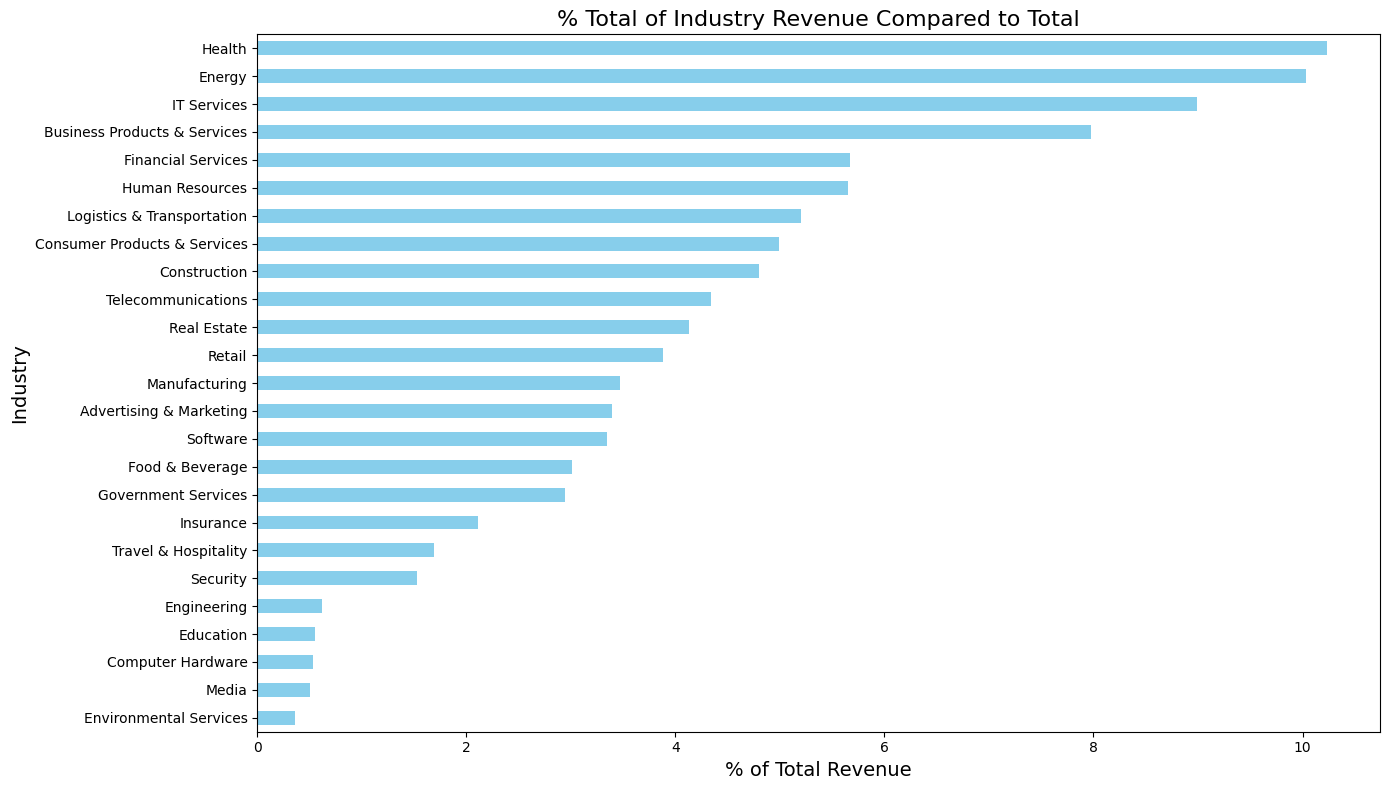

In [11]:

file_path = './Data Set- Inc5000 Company List_2014.csv'
inc5000_data = load_and_clean_data(file_path)

# Calculate and plot the revenue percentage by industry
industry_revenue_percentage = calculate_industry_revenue_percentage(inc5000_data)
plot_revenue_percentage(industry_revenue_percentage)


## Most hot growing insdustries by 2014

In [12]:
high_growth_industries = inc5000_data[inc5000_data['growth'] > 10000]

In [13]:
industry_growth = high_growth_industries.groupby('industry').agg({
    'growth': 'sum',
    'yrs_on_list': 'sum'
}).reset_index()

In [14]:
industry_growth

,industry,growth,yrs_on_list
0,Business Products & Services,69546.6776,2
1,Consumer Products & Services,173545.2554,3
2,Energy,47443.6720,4
3,Engineering,11374.9136,1
4,Financial Services,32197.5009,4
5,Food & Beverage,80147.1465,3
6,Government Services,11497.7718,1
7,Health,73087.1689,7
8,Software,26042.9630,1
9,Telecommunications,20690.4578,1


In [15]:
fig = px.treemap(industry_growth, path=['industry'], values='growth',
                 color='growth',
                 hover_data=['industry', 'growth', 'yrs_on_list'],
                 color_continuous_scale='Blues')

In [16]:
fig.update_layout(
    title='Highest Growing Industries',
    margin=dict(t=50, l=25, r=25, b=25)
)

fig.show()

## Top companies for each industry

In [17]:
# Filter for companies with over $1 billion in revenue
def get_top_companies_by_industry(data):
    filtered_data = data[data['revenue'] >= 0.9e9]
    top_companies = filtered_data.loc[filtered_data.groupby('industry')['revenue'].idxmax()]
    top_companies['revenue_in_billions'] = (top_companies['revenue'] / 1e9).round(1)
    return top_companies[['industry', 'company', 'revenue', 'revenue_in_billions']]

In [18]:
def create_highlight_table(data):
    fig = px.density_heatmap(data, x='industry', y='company', z='revenue_in_billions', 
                             color_continuous_scale='reds',
                             title='Top Companies ($1B+) by Industry')
    fig.update_layout(xaxis={'categoryorder':'total descending'})
    #fig.update_traces(text=data['revenue_in_billions'].apply(lambda x: f"{x}B"), textfont={'size': 6})
    fig.update_traces(texttemplate='%{z:.1f}', textfont={'size': 8})
    fig.show()

In [19]:
top_companies_data = get_top_companies_by_industry(inc5000_data)

In [20]:
top_companies_data

,industry,company,revenue,revenue_in_billions
2392,Business Products & Services,AmeriQuest Business Services,1.052692e+09,1.1
4949,Construction,ABC Supply,4.911167e+09,4.9
3957,Consumer Products & Services,Euro-Pro,1.285640e+09,1.3
3690,Energy,Eco-Energy Global Biofuels,4.138790e+09,4.1
3267,Food & Beverage,Hearthside Food Solutions,1.041889e+09,1.0
3240,Government Services,Carahsoft Technology,1.724988e+09,1.7
1982,Health,EnvisionRxOptions,3.644870e+09,3.6
3820,Human Resources,TriNet,1.644275e+09,1.6
4675,IT Services,GoDaddy.com,1.130845e+09,1.1
2918,Insurance,GuideOne Insurance,1.138555e+09,1.1


In [21]:
create_highlight_table(top_companies_data)

## fastest growing companies

In [22]:
# function to sort the companies by growth rate
def get_top_fastest_growing_companies(data):
    top_companies = data.nlargest(10, 'growth')
    return top_companies

In [23]:
def create_packed_bubble_chart(data):    
    fig = px.scatter(data_frame=data, x="company", y="growth",
                     size="growth", color="company",
                     hover_name="company", size_max=60,
                     title="The 9 Fastest Growing Companies (Revenue)")
    
    # Hide the axes
    fig.update_layout(xaxis={'visible': False, 'showticklabels': False},
                      yaxis={'visible': False, 'showticklabels': False})
    
    # Update the marker text to display the growth rate
    fig.update_traces(textposition='middle center', text=data.apply(lambda r: f"{r['company']}<br>{r['growth']:,.0f}", axis=1))
    
    # Show the figure
    fig.show()

In [24]:
top_fastest_growing_companies = get_top_fastest_growing_companies(inc5000_data)

In [25]:
top_fastest_growing_companies

,_input,_num,_widgetName,_source,_resultNumber,_pageUrl,id,rank,workers,company,url,state_l,state_s,city,metro,growth,revenue,industry,yrs_on_list
0,NaN,1,Inc5000 Company List,Inc5000 Company List,1,http://www.inc.com/inc5000list/json/inc5000_20...,22890,1,227.0,Fuhu,fuhu,California,CA,El Segundo,Los Angeles,158956.9106,195640000.0,Consumer Products & Services,2
1,NaN,2,Inc5000 Company List,Inc5000 Company List,2,http://www.inc.com/inc5000list/json/inc5000_20...,25747,2,191.0,Quest Nutrition,quest-nutrition,California,CA,El Segundo,Los Angeles,57347.9246,82640563.0,Food & Beverage,1
2,NaN,3,Inc5000 Company List,Inc5000 Company List,3,http://www.inc.com/inc5000list/json/inc5000_20...,25643,3,145.0,Reliant Asset Management,reliant-asset-management,Virginia,VA,Arlington,Washington DC,55460.1646,85076502.0,Business Products & Services,1
3,NaN,4,Inc5000 Company List,Inc5000 Company List,4,http://www.inc.com/inc5000list/json/inc5000_20...,26098,4,62.0,Superfish,superfish,California,CA,Palo Alto,San Jose,26042.9630,35293000.0,Software,1
4,NaN,5,Inc5000 Company List,Inc5000 Company List,5,http://www.inc.com/inc5000list/json/inc5000_20...,26182,5,92.0,Acacia Communications,acacia-communications,Massachusetts,MA,Maynard,Boston,20690.4578,77652360.0,Telecommunications,1
5,NaN,6,Inc5000 Company List,Inc5000 Company List,6,http://www.inc.com/inc5000list/json/inc5000_20...,22913,6,50.0,Provider Power,provider-power,Maine,ME,Auburn,Lewiston-Auburn ME,19876.5169,137977203.0,Energy,2
6,NaN,7,Inc5000 Company List,Inc5000 Company List,7,http://www.inc.com/inc5000list/json/inc5000_20...,22937,7,129.0,Crescendo Bioscience,crescendo-bioscience,California,CA,South San Francisco,San Francisco,18375.0693,27308000.0,Health,2
7,NaN,8,Inc5000 Company List,Inc5000 Company List,8,http://www.inc.com/inc5000list/json/inc5000_20...,25413,8,130.0,Plexus Worldwide,plexus-worldwide,Arizona,AZ,Scottsdale,Phoenix,16457.6529,159897088.0,Health,1
8,NaN,9,Inc5000 Company List,Inc5000 Company List,9,http://www.inc.com/inc5000list/json/inc5000_20...,26079,9,264.0,Vacasa,vacasa,Oregon,OR,Portland,Portland OR,16192.0610,26263454.0,Travel & Hospitality,1
9,NaN,10,Inc5000 Company List,Inc5000 Company List,10,http://www.inc.com/inc5000list/json/inc5000_20...,25861,10,11.0,Go Energies,go-energies,North Carolina,NC,Wilmington,Wilmington NC,16006.8013,32851754.0,Energy,1


In [26]:
create_packed_bubble_chart(top_fastest_growing_companies)

## revenue and growth rate for each state

In [27]:
def aggregate_by_state(data):
    state_aggregates = data.groupby('state_s').agg({'revenue':'sum', 'growth':'mean'}).reset_index()
    return state_aggregates

# Create a choropleth map to display the revenue and growth by state
def create_choropleth(data):
    fig = px.choropleth(data, locations="state_s", locationmode="USA-states",
                        color="revenue", scope="usa", hover_name="state_s",
                        hover_data={"state_s": False, "revenue": True, "growth": True},
                        color_continuous_scale="Blues",
                        title="Revenue vs. Growth per State")
    fig.show()

In [28]:
state_data = aggregate_by_state(inc5000_data)
state_data.head()

,state_s,revenue,growth
0,AK,1.231671e+07,67.572400
1,AL,1.226129e+09,648.141982
2,AR,1.135688e+08,206.437311
3,AZ,4.782486e+09,778.158290
4,CA,3.101739e+10,876.199162


In [29]:
create_choropleth(state_data)

## Top industry revenue per state

In [30]:
# Group by state and industry and sum revenues
def get_top_industry_by_state(data):
    industry_revenue = data.groupby(['state_s', 'industry'])['revenue'].sum().reset_index()
    top_industry_by_state = industry_revenue.loc[industry_revenue.groupby('state_s')['revenue'].idxmax()]
    return top_industry_by_state

In [31]:
def create_heatmap(data):
    fig = px.density_heatmap(data, x='state_s', y='industry', z='revenue', 
                             color_continuous_scale='OrRd', 
                             title='Top Industry (Revenue) by State',
                             labels={'revenue':'Revenue', 'state_s':'State', 'industry':'Industry'})
    fig.update_layout(xaxis={'side': 'top'}, yaxis={'categoryorder':'total ascending'})
    fig.show()

In [32]:
top_industry_data = get_top_industry_by_state(inc5000_data)
top_industry_data.head()

,state_s,industry,revenue
0,AK,Advertising & Marketing,1.231671e+07
9,AL,Government Services,4.479076e+08
25,AR,Manufacturing,3.037640e+07
38,AZ,Health,1.370108e+09
68,CA,Real Estate,5.772416e+09


In [33]:
create_heatmap(top_industry_data)

In [34]:
# Sort the data by revenue in descending order
def create_color_table(data):    
    data = data.sort_values(by='revenue', ascending=False)
    
    color_scale = 'Blues'

    fig = go.Figure(data=[go.Table(
        header=dict(values=['State', 'Top Industry', 'Revenue'],
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[data.state_s, data.industry, data.revenue.apply(lambda x: f"${x:,.0f}")],
                   fill_color=[['rgba(235, 193, 238, {})'.format(val) for val in data['revenue']/data['revenue'].max()]] * 3,
                   align='left'))
    ])
    
    fig.update_layout(title='Top Industry (Revenue) by State')
    fig.show()

In [35]:
top_industry_data = get_top_industry_by_state(inc5000_data)

In [36]:
create_color_table(top_industry_data)

## Top companies cities

In [37]:
def aggregate_data_by_city(data):
    aggregated_data = data.groupby('city').agg(
        total_revenue=pd.NamedAgg(column='revenue', aggfunc='sum'),
        company_count=pd.NamedAgg(column='company', aggfunc='count')
    ).reset_index()
    filtered_data = aggregated_data[aggregated_data['total_revenue'] > 1e9]
    return filtered_data

In [38]:
def create_scatter_plot(data):
    fig = px.scatter(
        data_frame=data,
        x='total_revenue',
        y='company_count',
        size='company_count',
        color='total_revenue',
        color_continuous_scale='Blues',
        hover_name='city',
        title='Cities with Most Top Companies ($1B+)',
        labels={'total_revenue': 'Revenue', 'company_count': 'Count of Company'}
    )
    fig.update_layout(coloraxis_colorbar=dict(
        title='Revenue',
        tickvals=[1e9, 2e9, 5e9, 7e9],
        ticktext=['1B', '2B', '5B', '7B']
    ))
    fig.show()

In [39]:
city_data = aggregate_data_by_city(inc5000_data)

In [40]:
create_scatter_plot(city_data)


In [41]:
def aggregate_data_by_city(data):
    aggregated_data = data.groupby('city').agg(
        total_revenue=pd.NamedAgg(column='revenue', aggfunc='sum'),
        company_count=pd.NamedAgg(column='company', aggfunc='count')
    ).reset_index()
    # more than 1 billion in revenue
    filtered_data = aggregated_data[aggregated_data['total_revenue'] > 1e9]
    return filtered_data

In [42]:
# plotly parameters and plot
def create_scatter_plot(data):
    fig = px.scatter(
        data_frame=data,
        x='total_revenue',
        y='company_count',
        size='company_count',
        color='total_revenue',
        text='city',  
        color_continuous_scale='Blues',
        title='Cities with Most Top Companies ($1B+)',
        labels={'total_revenue': 'Revenue', 'company_count': 'Count of Company'}
    )
    
    fig.update_layout(coloraxis_colorbar=dict(
        title='Revenue',
        tickvals=[1e9, 2e9, 5e9, 7e9],
        ticktext=['1B', '2B', '5B', '7B']
    ))
    
    fig.update_traces(textposition='top center')
    fig.show()

In [43]:
city_data = aggregate_data_by_city(inc5000_data)

In [44]:
create_scatter_plot(city_data)

## Number of employees

In [45]:
def aggregate_data_by_city(data):
    aggregated_data = data.groupby('city').agg(
        workers=pd.NamedAgg(column='workers', aggfunc='sum'),
        growth=pd.NamedAgg(column='growth', aggfunc='mean')
    ).reset_index()
    # Filter for cities with at least 5,000 workers
    filtered_data = aggregated_data[aggregated_data['workers'] >= 5000]
    sorted_data = filtered_data.sort_values('workers', ascending=False)
    return sorted_data

In [46]:
def create_bar_chart(data):
    fig = px.bar(
        data_frame=data,
        x='city',
        y='workers',
        color='growth',
        title='Workers in Each City',
        labels={'workers': 'Number of Workers', 'growth': 'Growth Rate'},
        color_continuous_scale='Blues'
    )
    fig.update_layout(xaxis={'categoryorder':'total descending'})
    fig.show()

In [47]:
city_data = aggregate_data_by_city(inc5000_data)
create_bar_chart(city_data)

## Growth Rate by Industry Analysis:

In [48]:
industry_growth = inc5000_data.groupby('industry')['growth'].mean().sort_values(ascending=False)
fig = px.bar(industry_growth, title='Average Growth Rate by Industry')
fig.show()

## Revenue Distribution Analysis:

In [49]:
fig = px.box(inc5000_data, x='industry', y='revenue', title='Revenue Distribution by Industry')
fig.show()

In [50]:
# Group by industry and calculate average growth
industry_growth = inc5000_data.groupby('industry')['growth'].mean().sort_values(ascending=False)
# Plotting the average growth by industry
fig_industry_growth = px.bar(industry_growth, title='Average Growth by Industry')
fig_industry_growth.show()


In [51]:
# Boxplot of revenue distribution by industry
fig_revenue_distribution = px.box(inc5000_data, x='industry', y='revenue', 
                                  notched=True, title='Revenue Distribution by Industry')
fig_revenue_distribution.show()


In [52]:
# Group by state and calculate total revenue
state_revenue = inc5000_data.groupby('state_l')['revenue'].sum().sort_values(ascending=False)

# Plotting total revenue by state
fig_state_revenue = px.bar(state_revenue, title='Total Revenue by State')
fig_state_revenue.show()


In [53]:
# Scatter plot to see if more workers correlate with higher growth
fig_workers_growth = px.scatter(inc5000_data, x='workers', y='growth', 
                                trendline='ols', title='Correlation between Workers and Growth')
fig_workers_growth.show()
